<a href="https://colab.research.google.com/github/ktyingith/test/blob/main/keras_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###IMDB 데이터셋 로드하기###

In [ ]:
NUM_WORDS = 10000

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)
word_index = imdb.get_word_index()
revers_word_index = dict( [(value, key) for (key, value) in word_index.items()])


17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


1646592/1641221 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
import numpy as np

def printts(prefix, tensor) :
  print("{} type:{} rank:{} size:{} shape:{}".format(
        prefix, tensor.dtype, tensor.ndim, tensor.size, tensor.shape))
  print("{}".format(tensor[0]))

def vectorize_sequences(sequences, dimension=NUM_WORDS) :
  results = np.zeros( (len(sequences), dimension) )
  for i, sequence in enumerate(sequences) :
    results[i, sequence] = 1
  return results

In [ ]:
printts("train_data", train_data)
printts("train_labels", train_labels)

assert max( [ max(item) for item in train_data ] ) < NUM_WORDS
decoded_review = ' '.join( [revers_word_index.get(i - 3, "?") for i in train_data[0] ] )
print(decoded_review)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

train_data type:object rank:1 size:25000 shape:(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
trai

In [ ]:
printts("x_train", x_train)
printts("y_train", y_train)

x_train type:float64 rank:2 size:250000000 shape:(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]
y_train type:float32 rank:1 size:25000 shape:(25000,)
1.0


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add( layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)) )
model.add( layers.Dense(16, activation='relu'))
model.add( layers.Dense(1, activation='sigmoid') )
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5912 - acc: 0.7019 - val_loss: 0.3893 - val_acc: 0.8688
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3225 - acc: 0.9074 - val_loss: 0.3033 - val_acc: 0.8891
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2292 - acc: 0.9303 - val_loss: 0.2793 - val_acc: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1737 - acc: 0.9449 - val_loss: 0.2738 - val_acc: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1420 - acc: 0.9573 - val_loss: 0.3043 - val_acc: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1137 - acc: 0.9667 - val_loss: 0.3021 - val_acc: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0957 - acc: 0.9724 - val_loss: 0.3138 - val_acc: 0.8817
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0781 - a

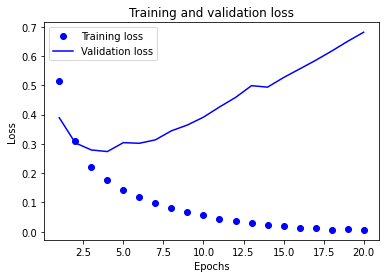

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

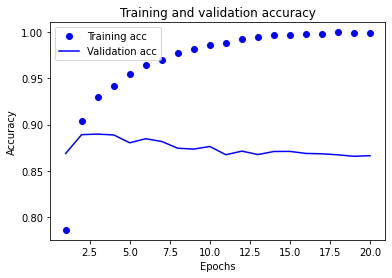

In [ ]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add( layers.Dense(32, activation='relu', input_shape=(NUM_WORDS,)) )
model.add( layers.Dense(32, activation='relu'))
model.add( layers.Dense(1, activation='sigmoid') )
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
print( results )

Epoch 1/3
49/49 [==============================] - 2s 23ms/step - loss: 0.5352 - accuracy: 0.7330
Epoch 2/3
49/49 [==============================] - 1s 22ms/step - loss: 0.2501 - accuracy: 0.9147
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.2874 - accuracy: 0.8861
[0.2873966097831726, 0.8861200213432312]


In [ ]:


model.predict(x_test)

array([[0.24562484],
       [0.99961746],
       [0.8482491 ],
       ...,
       [0.1557512 ],
       [0.07787749],
       [0.55669814]], dtype=float32)